In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashwatishrimali","key":"fae120a8e0246f834b90d1c6e85ec8ec"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets download andrewmvd/liver-tumor-segmentation-part-2
#! kaggle datasets download andrewmvd/liver-tumor-segmentation

  1% 119M/10.8G [00:06<09:26, 20.3MB/s]User cancelled operation


In [ ]:
! unzip "/content/gdrive/MyDrive/liver/liver-tumor-segmentation.zip" -d liver-tumor-segmentation

Archive:  /content/gdrive/MyDrive/liver/liver-tumor-segmentation.zip
  inflating: liver-tumor-segmentation/segmentations/segmentation-0.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-1.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-10.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-100.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-101.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-102.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-103.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-104.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-105.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-106.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-107.nii  
  inflating: liver-tumor-segmentation/segmentations/segmentation-108.nii  
  inflating: liver-tumor-segmentatio

In [ ]:
! unzip "/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2.zip" -d liver-tumor-segmentation-part-2

Archive:  /content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2.zip
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-100.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-51.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-52.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-53.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-54.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-55.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-56.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-57.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-58.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-59.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-60.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/volume-61.nii  
  inflating: liver-tumor-segmentation-part-2/volume_pt6/vol

In [ ]:
!mv '/content/liver-tumor-segmentation-part-2' '/content/gdrive/MyDrive/liver'

In [ ]:
!mv '/content/liver-tumor-segmentation' '/content/gdrive/MyDrive/liver'

In [ ]:
!pip install --upgrade kornia > /dev/null
!pip install --upgrade fastai > /dev/null

In [ ]:
import os
import glob
import cv2
import imageio

import numpy as np 
import pandas as pd 
import nibabel as nib
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from ipywidgets import *
from PIL import Image
from matplotlib.pyplot import figure

from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

In [ ]:

file_list = []
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/liver/liver-tumor-segmentation'):
    for filename in filenames:
        file_list.append((dirname, filename)) 

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2'):
    for filename in filenames:
        file_list.append((dirname, filename)) 

df_files = pd.DataFrame(file_list, columns =['dirname', 'filename']) 
df_files.sort_values(by=['filename'], ascending=True)    

,dirname,filename
20,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-0.nii
21,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-1.nii
22,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-10.nii
23,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-100.nii
24,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-101.nii
...,...,...
227,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-95.nii
228,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-96.nii
229,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-97.nii
230,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-98.nii


In [ ]:
df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations"

df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 

df_files

,dirname,filename,mask_dirname,mask_filename
0,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/volume_pt1,volume-0.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/volume_pt1,volume-1.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/volume_pt1,volume-10.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-100.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-100.nii
4,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt8,volume-101.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-101.nii
...,...,...,...,...
126,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-95.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-95.nii
127,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-96.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-96.nii
128,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-97.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-97.nii
129,/content/gdrive/MyDrive/liver/liver-tumor-segmentation-part-2/volume_pt6,volume-98.nii,/content/gdrive/MyDrive/liver/liver-tumor-segmentation/segmentations,segmentation-98.nii


In [ ]:
def read_nii(filepath):

    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [ ]:
sample = 0
sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])

print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 75)
Mask Shape: (512, 512, 75)


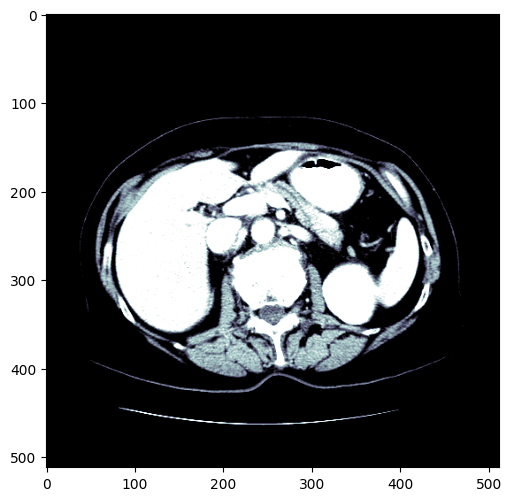

In [ ]:
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)

plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [ ]:
def plot_sample(array_list, color_map = 'nipy_spectral'):

    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')
             
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')
    
    plt.show()

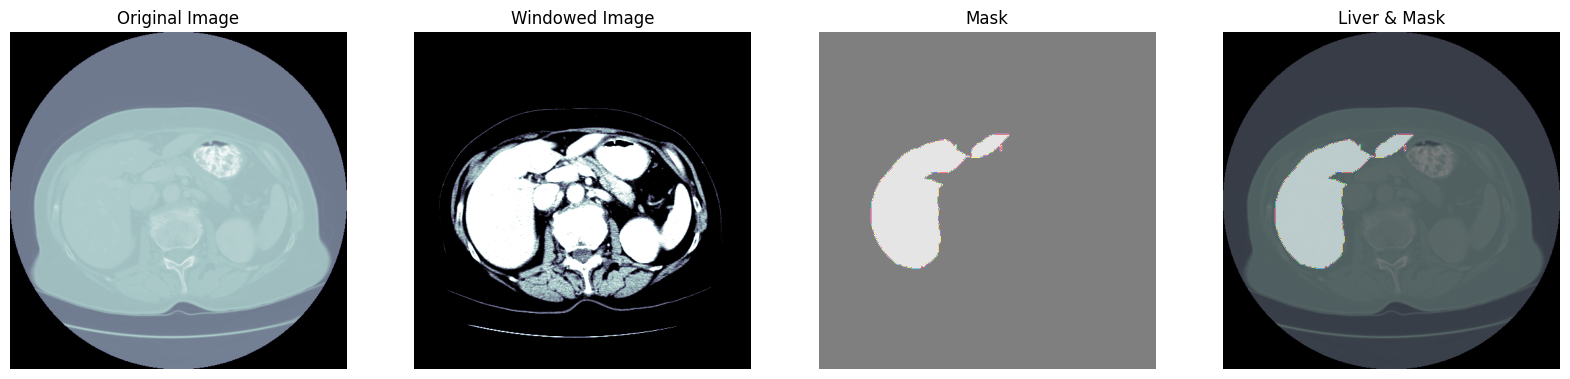

In [ ]:
sample = 55

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

In [ ]:
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L")
unique, counts = np.unique(mask, return_counts=True)
print(np.array((unique, counts)).T)

[[     0 244111]
 [     1  18033]]


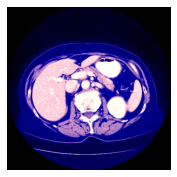

In [ ]:
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)
    
    
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

In [ ]:
GENERATE_JPG_FILES = True

if (GENERATE_JPG_FILES) :
    
    path = Path(".")

    os.makedirs('train_images',exist_ok=True)
    os.makedirs('train_masks',exist_ok=True)

    for ii in tqdm(range(0,len(df_files),3)):
        curr_ct        = read_nii(df_files.loc[ii,'dirname']+"/"+df_files.loc[ii,'filename'])
        curr_mask      = read_nii(df_files.loc[ii,'mask_dirname']+"/"+df_files.loc[ii,'mask_filename'])
        curr_file_name = str(df_files.loc[ii,'filename']).split('.')[0]
        curr_dim       = curr_ct.shape[2] 

        for curr_slice in range(0,curr_dim,2): 
            data = tensor(curr_ct[...,curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver,dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")


  0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
BATCH_SIZE = 16
IMAGE_SIZE = 128
GENERATE_JPG_FILES = True
codes = np.array(["background","liver","tumor"])
    
def get_x(fname:Path): return fname
def label_func(x): return path/'train_masks'/f'{x.stem}_mask.png'

tfms = [IntToFloatTensor(),Normalize()]

db = DataBlock(blocks=(ImageBlock(),MaskBlock(codes)), 
               batch_tfms=tfms,
               splitter=RandomSplitter(),
               item_tfms=[Resize(IMAGE_SIZE)],
               get_items=get_image_files,
               get_y=label_func)

ds = db.datasets(source=path/'train_images')

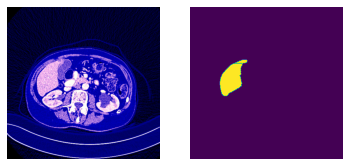

In [ ]:
idx = 20
imgs = [ds[idx][0],ds[idx][1]]
fig, axs = plt.subplots(1, 2)

for i,ax in enumerate(axs.flatten()):
    ax.axis('off')
    ax.imshow(imgs[i])

In [ ]:
unique, counts = np.unique(array(ds[idx][1]), return_counts=True)

print( np.array((unique, counts)).T)

[[     0 256000]
 [     1   6144]]


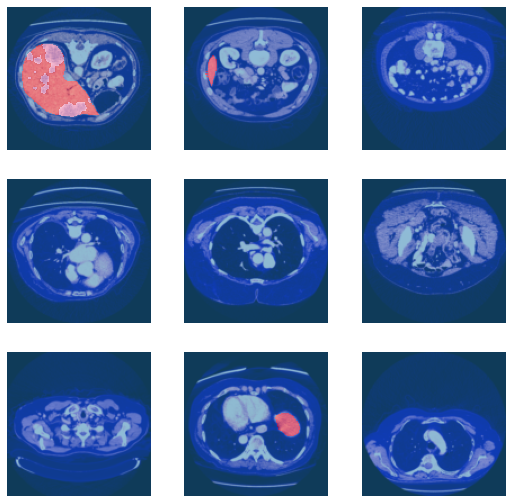

In [ ]:
dls = db.dataloaders(path/'train_images', bs = BATCH_SIZE) 
dls.show_batch()

In [ ]:
def foreground_acc(inp, targ, bkg_idx=0, axis=1):  
    targ = targ.squeeze(1)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask]==targ[mask]).float().mean() 

def dice(input, target):
    input = input.argmax(dim=1).float()
    target = target.squeeze(1).float()
    
    smooth = 1.
    numerator = 2. * (input * target).sum()
    denumerator = (input + target).sum()
    return (numerator + smooth) / (denumerator + smooth)

def cust_foreground_acc(inp, targ): 
    return foreground_acc(inp=inp, targ=targ, bkg_idx=3, axis=1) 

In [ ]:
learn = unet_learner(dls,resnet50,loss_func=CrossEntropyLossFlat(axis=1), metrics=[foreground_acc, cust_foreground_acc,dice]) 

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
learn.fine_tune(20, wd=0.1, cbs=SaveModelCallback())

epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,dice,time
0,0.008225,0.006591,0.933091,0.997609,1.034559,09:51


Better model found at epoch 0 with valid_loss value: 0.006590958219021559.


epoch,train_loss,valid_loss,foreground_acc,cust_foreground_acc,dice,time
0,0.004793,0.004891,0.952034,0.998135,1.043576,10:07
1,0.004154,0.004471,0.946338,0.998260,1.062490,10:01
2,0.003869,0.004332,0.964825,0.998308,1.052888,10:06
3,0.004069,0.003913,0.956363,0.998501,1.057196,10:05
4,0.004133,0.004332,0.965056,0.998353,1.052525,10:01
5,0.003504,0.003926,0.961405,0.998527,1.062515,10:07
6,0.003070,0.003450,0.962604,0.998674,1.061942,10:04
7,0.003104,0.003561,0.951570,0.998609,1.060964,10:05
8,0.002977,0.003066,0.968900,0.998816,1.071843,10:05
9,0.002501,0.003012,0.970581,0.998837,1.070362,10:01


Better model found at epoch 0 with valid_loss value: 0.004890897311270237.
Better model found at epoch 1 with valid_loss value: 0.004470937419682741.
Better model found at epoch 2 with valid_loss value: 0.004332323558628559.
Better model found at epoch 3 with valid_loss value: 0.003912550862878561.
Better model found at epoch 6 with valid_loss value: 0.0034498211462050676.
Better model found at epoch 8 with valid_loss value: 0.003065720433369279.
Better model found at epoch 9 with valid_loss value: 0.003012178698554635.
Better model found at epoch 11 with valid_loss value: 0.002820379100739956.
Better model found at epoch 12 with valid_loss value: 0.0027330038137733936.
Better model found at epoch 13 with valid_loss value: 0.002616646233946085.
Better model found at epoch 15 with valid_loss value: 0.002542012371122837.
Better model found at epoch 16 with valid_loss value: 0.0025357354898005724.


SuggestedLRs(valley=0.0004786300996784121)

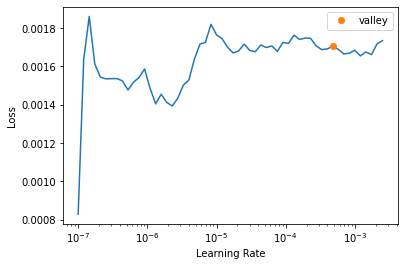

In [ ]:
learn.lr_find()

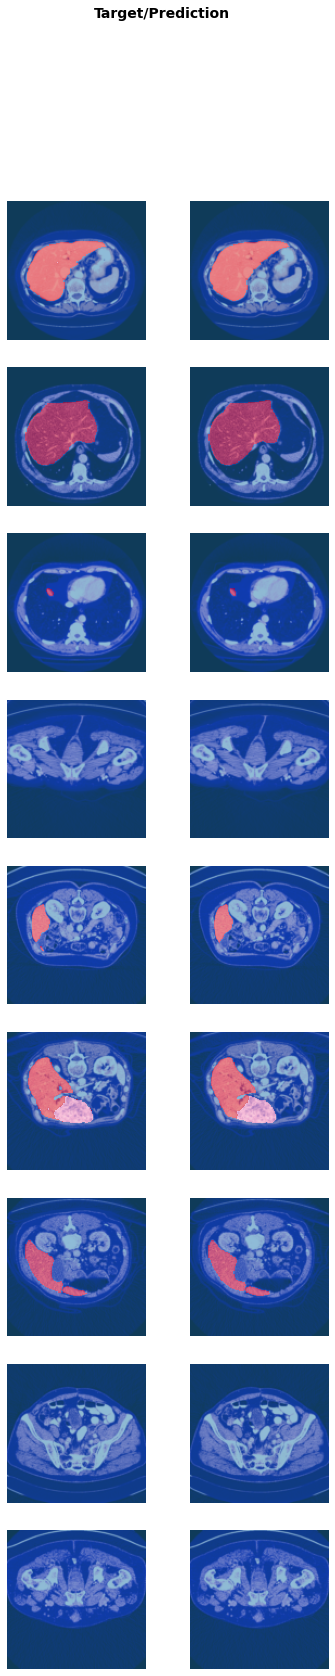

In [ ]:
learn.show_results()

In [ ]:
learn.export('Liver_segmentation')

In [ ]:
if (GENERATE_JPG_FILES) :
    
    tfms = [Resize(IMAGE_SIZE), IntToFloatTensor(),Normalize()]
    learn0 = load_learner('Liver_segmentation',cpu=False )
    learn0.dls.transform = tfms

In [ ]:
def nii_tfm(fn,wins): 

    test_nii  = read_nii(fn)
    curr_dim  = test_nii.shape[2] # 512, 512, curr_dim
    slices = []
    
    for curr_slice in range(curr_dim):
        data = tensor(test_nii[...,curr_slice].astype(np.float32))
        data = (data.to_nchan(wins)*255).byte()
        slices.append(TensorImage(data))
                      
    return slices 

In [ ]:
!cp '/content/Liver_segmentation' '/content/gdrive/MyDrive/liver'

(512, 512, 908)


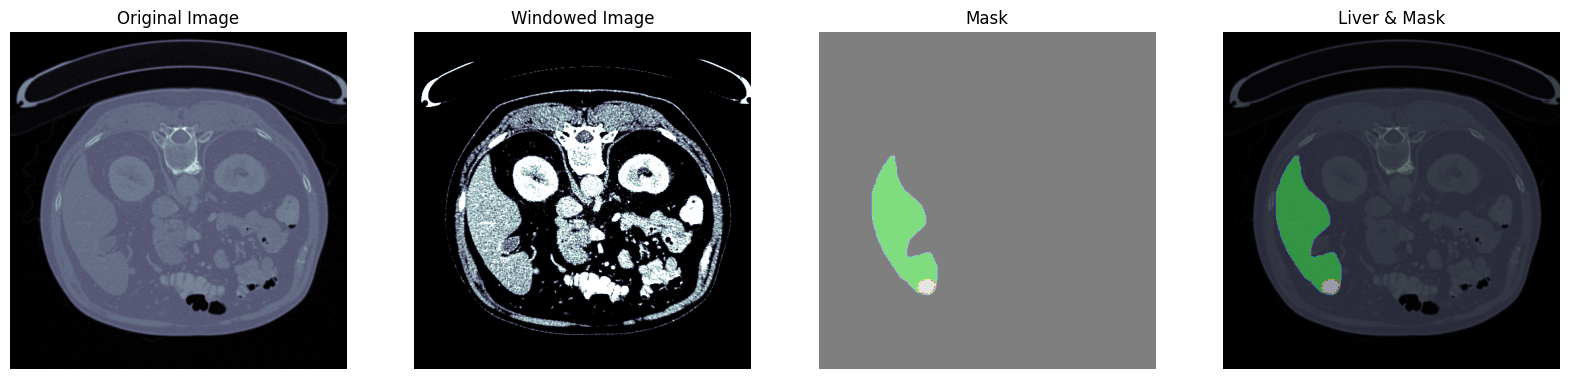

In [ ]:
tst = 20

test_nii   = read_nii(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'])
test_mask  = read_nii(df_files.loc[tst,'mask_dirname']+"/"+df_files.loc[tst,'mask_filename'])
print(test_nii.shape)

test_slice_idx = 500

sample_slice = tensor(test_nii[...,test_slice_idx].astype(np.float32))

plot_sample([test_nii[...,test_slice_idx], test_mask[...,test_slice_idx]])

(512, 512, 685)


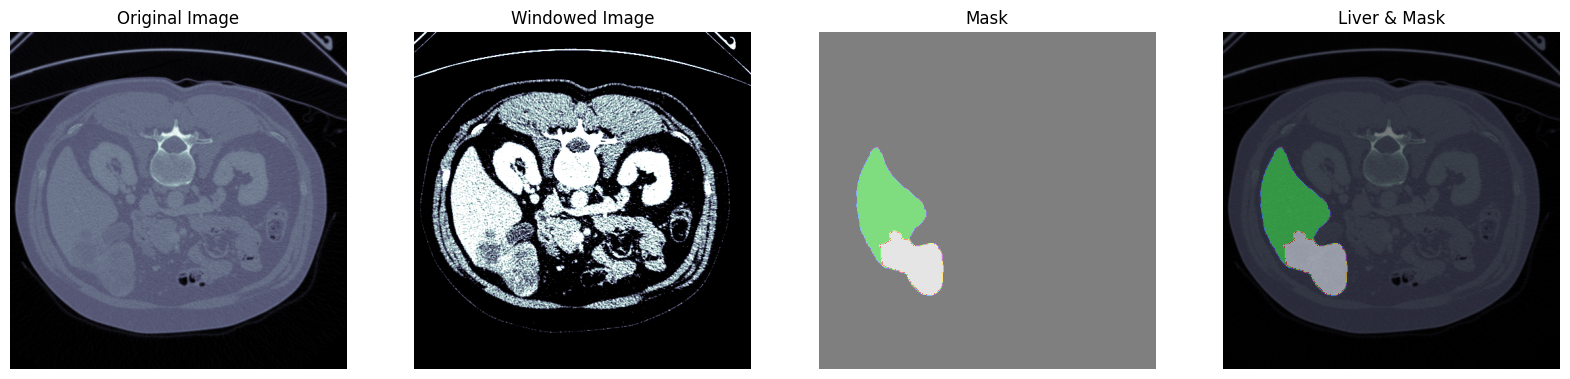

In [ ]:
tst = 3

test_slice_idx = 450

test_nii   = read_nii(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'])
test_mask  = read_nii(df_files.loc[tst,'mask_dirname']+"/"+df_files.loc[tst,'mask_filename'])
print(test_nii.shape)

sample_slice = tensor(test_nii[...,test_slice_idx].astype(np.float32))

plot_sample([test_nii[...,test_slice_idx], test_mask[...,test_slice_idx]])

In [ ]:
tst = 3

test_slice_idx = 450

test_files = nii_tfm(df_files.loc[tst,'dirname']+"/"+df_files.loc[tst,'filename'],[dicom_windows.liver, dicom_windows.custom])
print("Number of test slices: ", len(test_files))

Number of test slices:  685


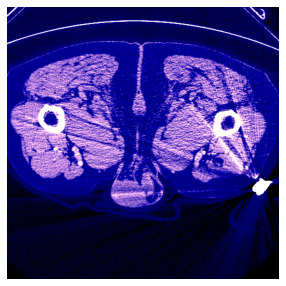

In [ ]:
show_image(test_files[0])

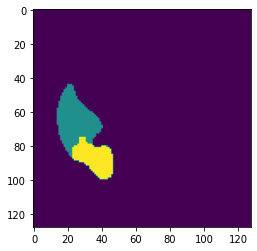

In [ ]:
test_dl = learn0.dls.test_dl(test_files)
preds, y = learn0.get_preds(dl=test_dl)

predicted_mask = np.argmax(preds, axis=1)

plt.imshow(predicted_mask[test_slice_idx])

  0%|          | 0/30 [00:00<?, ?it/s]

curr slice: 250
predicted [0]
actual: [0]


curr slice: 260
predicted [0]
actual: [0]


curr slice: 270
predicted [0]
actual: [0]


curr slice: 280
predicted [0]
actual: [0]


curr slice: 290
predicted [0]
actual: [0]


curr slice: 300
predicted [0]
actual: [0]


curr slice: 310
predicted [0]
actual: [0]


curr slice: 320
predicted [0]
actual: [0]


curr slice: 330
predicted [0]
actual: [0]


curr slice: 340
predicted [0]
actual: [0]


curr slice: 350
predicted [0]
actual: [0]


curr slice: 360
predicted [0]
actual: [0]


curr slice: 370
predicted [0]
actual: [0]


curr slice: 380
predicted [0]
actual: [0]


curr slice: 390
predicted [0 1]
actual: [0 1]


curr slice: 400
predicted [0 1]
actual: [0 1]


curr slice: 410
predicted [0 1 2]
actual: [0 1 2]


curr slice: 420
predicted [0 1]
actual: [0 1 2]


curr slice: 430
predicted [0 1 2]
actual: [0 1 2]


curr slice: 440
predicted [0 1 2]
actual: [0 1 2]


curr slice: 450
predicted [0 1 2]
actual: [0 1 2]


curr slice: 460
predicted [0 1 2]
actual: [0 1 2]


curr slice: 470
predicted [0 1 2]
actual: [0 1 2]


curr slice: 480
predicted [0 1 2]
actual: [0 1 2]


curr slice: 490
predicted [0 1 2]
actual: [0 1 2]


curr slice: 500
predicted [0 1 2]
actual: [0 1 2]


curr slice: 510
predicted [0 1 2]
actual: [0 1 2]


curr slice: 520
predicted [0 1 2]
actual: [0 1 2]


curr slice: 530
predicted [0 1 2]
actual: [0 1 2]


curr slice: 540
predicted [0 1 2]
actual: [0 1 2]


  0%|          | 0/30 [00:00<?, ?it/s]

curr slice: 250
predicted [0]
actual: [0]


curr slice: 260
predicted [0]
actual: [0]


curr slice: 270
predicted [0]
actual: [0]


curr slice: 280
predicted [0]
actual: [0]


curr slice: 290
predicted [0 1]
actual: [0]


curr slice: 300
predicted [0]
actual: [0]


curr slice: 310
predicted [0]
actual: [0]


curr slice: 320
predicted [0]
actual: [0]


curr slice: 330
predicted [0]
actual: [0]


curr slice: 340
predicted [0]
actual: [0]


curr slice: 350
predicted [0]
actual: [0]


curr slice: 360
predicted [0]
actual: [0]


curr slice: 370
predicted [0]
actual: [0]


curr slice: 380
predicted [0]
actual: [0]


curr slice: 390
predicted [0 1]
actual: [0 1]


curr slice: 400
predicted [0 1]
actual: [0 1]


curr slice: 410
predicted [0 1 2]
actual: [0 1 2]


curr slice: 420
predicted [0 1 2]
actual: [0 1 2]


curr slice: 430
predicted [0 1 2]
actual: [0 1 2]


curr slice: 440
predicted [0 1 2]
actual: [0 1 2]


curr slice: 450
predicted [0 1 2]
actual: [0 1 2]


curr slice: 460
predicted [0 1 2]
actual: [0 1 2]


curr slice: 470
predicted [0 1 2]
actual: [0 1 2]


curr slice: 480
predicted [0 1 2]
actual: [0 1 2]


curr slice: 490
predicted [0 1 2]
actual: [0 1 2]


curr slice: 500
predicted [0 1 2]
actual: [0 1 2]


curr slice: 510
predicted [0 1 2]
actual: [0 1 2]


curr slice: 520
predicted [0 1 2]
actual: [0 1 2]


curr slice: 530
predicted [0 1 2]
actual: [0 1 2]


curr slice: 540
predicted [0 1 2]
actual: [0 1 2]


  0%|          | 0/30 [00:00<?, ?it/s]

curr slice: 250
predicted [0]
actual: [0]


curr slice: 260
predicted [0]
actual: [0]


curr slice: 270
predicted [0]
actual: [0]


curr slice: 280
predicted [0]
actual: [0]


curr slice: 290
predicted [0]
actual: [0]


curr slice: 300
predicted [0]
actual: [0]


curr slice: 310
predicted [0]
actual: [0]


curr slice: 320
predicted [0]
actual: [0]


curr slice: 330
predicted [0]
actual: [0]


curr slice: 340
predicted [0]
actual: [0]


curr slice: 350
predicted [0]
actual: [0]


curr slice: 360
predicted [0]
actual: [0]


curr slice: 370
predicted [0]
actual: [0]


curr slice: 380
predicted [0]
actual: [0 1]


curr slice: 390
predicted [0]
actual: [0 1]


curr slice: 400
predicted [0 1]
actual: [0 1]


curr slice: 410
predicted [0 1]
actual: [0 1]


curr slice: 420
predicted [0 1]
actual: [0 1]


curr slice: 430
predicted [0 1]
actual: [0 1]


curr slice: 440
predicted [0 1]
actual: [0 1]


curr slice: 450
predicted [0 1]
actual: [0 1]


curr slice: 460
predicted [0 1]
actual: [0 1]


curr slice: 470
predicted [0 1]
actual: [0 1]


curr slice: 480
predicted [0 1]
actual: [0 1 2]


curr slice: 490
predicted [0 1 2]
actual: [0 1 2]


curr slice: 500
predicted [0 1 2]
actual: [0 1 2]


curr slice: 510
predicted [0 1 2]
actual: [0 1 2]


curr slice: 520
predicted [0 1 2]
actual: [0 1 2]


curr slice: 530
predicted [0 1]
actual: [0 1]


curr slice: 540
predicted [0 1 2]
actual: [0 1]
[[31  1]
 [ 2 56]]


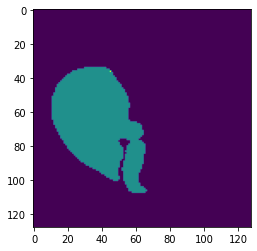

In [ ]:
def nii_tfm_selctive(fn,wins,curr_slice): 
    slices = []
    test_nii  = read_nii(fn)
    data = tensor(test_nii[...,curr_slice].astype(np.float32))
    data = (data.to_nchan(wins)*255).byte()
    slices.append(TensorImage(data))
    return slices

def check(img):
    cnt,h = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if len(cnt) > 0:
        return 1
    else:
        return 0
    

nums = [3,4,5]
vol_names = ['volume-100.nii','volume-102.nii','volume-102.nii']
seg_names = ['segmentation-100.nii','segmentation-102.nii','segmentation-102.nii']


conf_matrix =  np.zeros((2,2),dtype = int)


for nums,vol_names,seg_names in zip(nums,vol_names,seg_names):
    curr_mask      = read_nii(df_files.loc[nums,'mask_dirname']+"/"+df_files.loc[nums,'mask_filename'])
    for curr_slice in tqdm(range(250,550,10)): 

        test_file = nii_tfm_selctive(df_files.loc[nums,'dirname']+"/"+df_files.loc[nums,'filename'],[dicom_windows.liver, dicom_windows.custom],curr_slice)
        test_dl = learn0.dls.test_dl(test_file)
        preds, y = learn0.get_preds(dl=test_dl)
        
        predicted_mask = np.argmax(preds, axis=1)
        plt.imshow(predicted_mask[0])
        a=np.array(predicted_mask[0])
        
        tumor_p = False
        
        print('curr slice:',curr_slice)
        
        unique = np.unique(a)
        print("predicted",unique)
        if 0 in unique:
            back_p = True
        else:
            back_p = False
        if 1 in unique:
            liver_p = True
        else:
            liver_p = False
        if 2 in unique:
            tumor_p = True
        else:
            tumor_p = False
        

        mask = Image.fromarray(curr_mask[...,curr_slice].astype('uint8'), mode="L")
        tumor_t = False
        
        unique = np.unique(mask)
        print("actual:",unique)
        if 0 in unique:
            back_t = True
        else:
            back_t = False
        if 1 in unique:
            liver_t = True
        else:
            liver_t = False
        if 2 in unique:
            tumor_t = True
        else:
            tumor_t = False

        if tumor_p == True and tumor_t == True:
            conf_matrix[0,0] += 1
        if tumor_p == False and tumor_t == False:
            conf_matrix[1,1] += 1
        if tumor_p == False and tumor_t == True:
            conf_matrix[1,0] += 1
        if tumor_p == True and tumor_t == False:
            conf_matrix[0,1] += 1
            
        
print(conf_matrix)
            

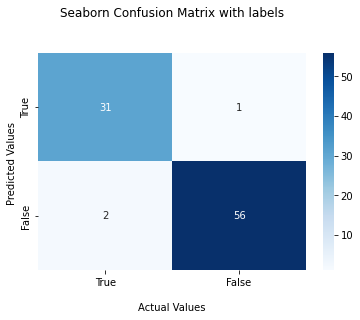

In [ ]:
import seaborn as sns

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

plt.show()